# Pymaceuticals Inc.
---

### Analysis

 
Overall, Capomulin emerges as one of the most effective drug regimens in reducing tumor volume, displaying lower mean and median tumor volumes, as well as lower variance and standard deviation. These indicators suggest a more consistent and potentially potent treatment. 

Ramicane also stands out, exhibiting a similarly low mean tumor volume (40.22) and consistent results across various statistical measures. Comparable to Capomulin, Ramicane demonstrates effectiveness in reducing tumor sizes with lower variability. It is worth noting that both Capomulin and Ramicane had the highest number of observed timepoints.

Additionally, there was duplicate data for mouse ID g989, which was removed prior to analysis to address potential biases and ensure the integrity of the data.

In [237]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
Overall, Capomulin emerges as one of the most effective drug regimens in reducing tumor volume, displaying lower mean and median tumor volumes, as well as lower variance and standard deviation. These indicators suggest a more consistent and potentially potent treatment. However, a more comprehensive understanding of the data and the significance of these differences may be gained through additional statistical tests and visualizations.

Ramicane also stands out, exhibiting a similarly low mean tumor volume (40.22) and consistent results across various statistical measures. Comparable to Capomulin, Ramicane demonstrates effectiveness in reducing tumor sizes with lower variability. It is worth noting that both Capomulin and Ramicane had the highest number of observed timepoints.

Additionally, there was duplicate data for mouse ID g989, which was removed prior to analysis to address potential biases and ensure the integrity of the data.

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merge_df.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [3]:
# Checking the number of mice.
len(merge_df["Mouse ID"].unique())

249

In [12]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupe = merge_df.duplicated(subset = ["Mouse ID", "Timepoint"])
merge_df[dupe]["Mouse ID"].unique()

array(['g989'], dtype=object)

In [13]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_id = merge_df[merge_df["Mouse ID"] == "g989"]
duplicate_id

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26         35   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392                 0  
912           51.745156                 0  
913           49.880528                 0  
914           51.325852                 1  
915           53.442020                 0  
916           55.326122                 1  
917           54.657650                 1  
918           56.045564                 1  
919           59.082294                 1  
920           62.570880                 2

In [14]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
updated_df = merge_df[merge_df["Mouse ID"] !="g989"]
updated_df.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [15]:
# Checking the number of mice in the clean DataFrame.
len(updated_df["Mouse ID"].unique())

248

## Summary Statistics

In [255]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_df = updated_df.groupby(["Drug Regimen"])
mean_df = drug_df["Tumor Volume (mm3)"].mean()
median_df = drug_df["Tumor Volume (mm3)"].median()
var_df = drug_df["Tumor Volume (mm3)"].var()
sd_df = drug_df["Tumor Volume (mm3)"].std()
sem_df = drug_df["Tumor Volume (mm3)"].sem()

summary_df = pd.DataFrame({"Mean Tumor Volume": mean_df, 
                           "Median Tumor Volume":median_df,
                           "Tumor Volume Variance":var_df,
                           "Tumor Volume Std. Dev.":sd_df,
                           "Tumor Volume Std. Err.":sem_df})
summary_df

Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume Std. Err.  
Drug Regimen                                                  
Capomulin                   4.994774                0.329346  
Ceftamin                    6.268188                0.469821  
Infubinol                   6.567243                0.492236  
Ketapril                    8.279709                0.603860  
Naftisol                    8.134708                0.596466  
Placebo                     7.821003                0.581331  
Propriva                    6.622085                0.544332  
Ramicane                    4.846308                0.320955  
Stelasyn                    7.710419                0.573111  
Zoniferol                   6.966589                0.516398

In [264]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_df = updated_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var","std","sem"]})

agg_df


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

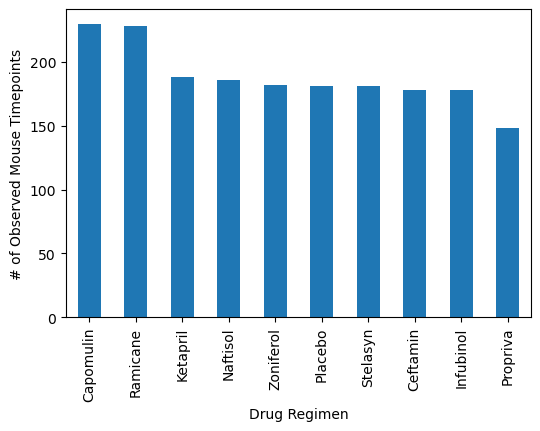

In [18]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
panda_bar_data = drug_df["Timepoint"].count()
panda_bar_data = panda_bar_data.sort_values(ascending=False)
panda_bar = panda_bar_data.plot(kind='bar', figsize=(6,4))

panda_bar.set_xlabel("Drug Regimen")
panda_bar.set_ylabel("# of Observed Mouse Timepoints")

plt.show()

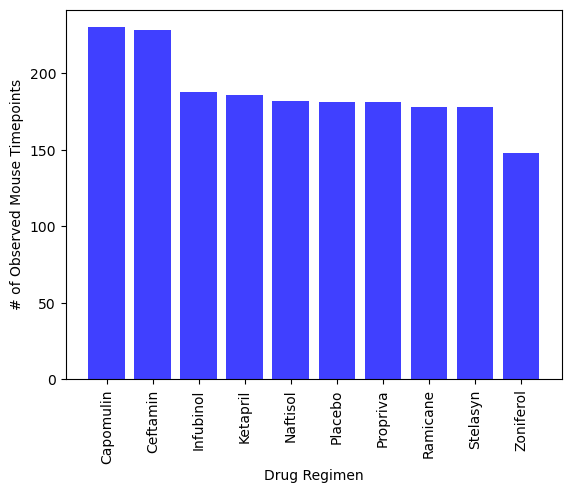

In [270]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(summary_df))
y_axis = panda_bar_data
plt.bar(x_axis, y_axis, color='b',alpha=0.75)
plt.xticks(x_axis, summary_df.index, rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

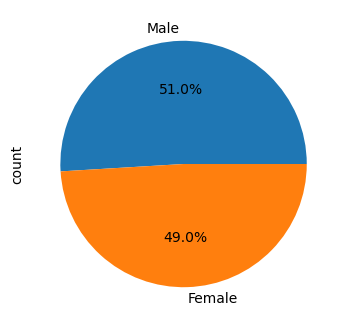

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_count = updated_df["Sex"].value_counts()

gender_df = updated_df.groupby(["Sex"]).count()

panda_pie = gender_count.plot(kind='pie', figsize=(6,4),autopct='%1.1f%%')

plt.show()


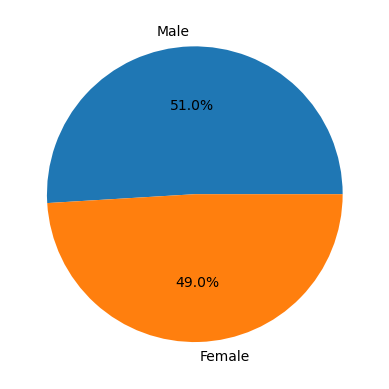

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_df = updated_df["Sex"].value_counts()

labels = ["Male", "Female"]
sizes = gender_df
explode = (0.1,0)

plt.pie(sizes,labels=labels, autopct="%1.1f%%")

plt.show()


## Quartiles, Outliers and Boxplots

In [107]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tp = updated_df.groupby("Mouse ID")["Timepoint"].max()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

max_tp_merge = pd.merge(max_tp, updated_df, on=["Mouse ID","Timepoint"])
max_tp_merge

Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0       a203         45    Infubinol  Female          20          23   
1       a251         45    Infubinol  Female          21          25   
2       a262         45      Placebo  Female          17          29   
3       a275         45     Ceftamin  Female          20          28   
4       a366         30     Stelasyn  Female          16          29   
..       ...        ...          ...     ...         ...         ...   
243     z435         10     Propriva  Female          12          26   
244     z578         45     Ramicane    Male          11          16   
245     z581         45    Infubinol  Female          24          25   
246     z795         45     Naftisol  Female          13          29   
247     z969         45     Naftisol    Male           9          30   

     Tumor Volume (mm3)  Metastatic Sites  
0             67.973419                 2  
1             65.525743                 1  
2             70.717621                 4  
3             62.999356                 3  
4             63.440686                 1  
..                  ...               ...  
243           48.710661                 0  
244           30.638696                 0  
245           62.754451                 3  
246           65.741070                 3  
247           73.867845                 4  

[248 rows x 8 columns]

In [136]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds

for drug in drug_list:
    drug_data = max_tp_merge[max_tp_merge["Drug Regimen"] == drug][["Tumor Volume (mm3)","Drug Regimen"]]
    tumor_vol_data.append(drug_data)
    
    q1 = drug_data.quantile(0.25)
    q3 = drug_data.quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    potential_outliers = drug_data[(drug_data < lower_bound) | (drug_data > upper_bound)]
    
    print(f"{drug}'s potential outliers: {potential_outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


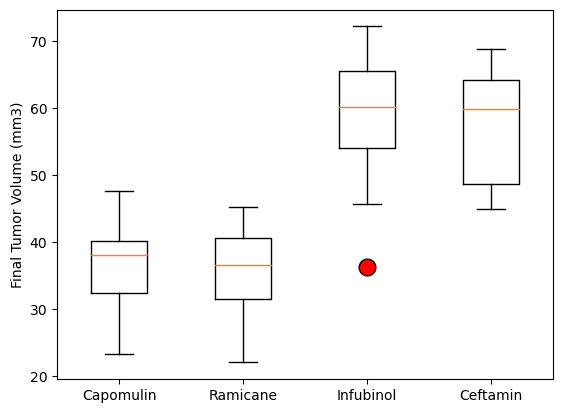

In [143]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(tumor_vol_data, flierprops=dict(markerfacecolor='red', markersize=12))
ax1.set_xticklabels(drug_list)

plt.show()


## Line and Scatter Plots

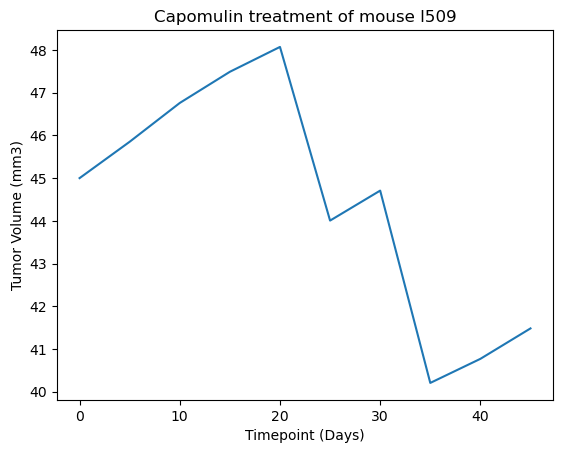

In [154]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

l509_filter = updated_df[updated_df["Mouse ID"] == "l509"]
x_axis = l509_filter["Timepoint"]
y_axis = l509_filter["Tumor Volume (mm3)"]

plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")

plt.plot(x_axis, y_axis)


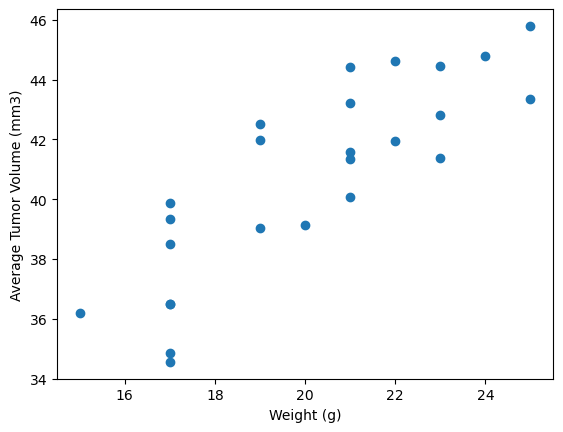

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = updated_df[updated_df["Drug Regimen"] == "Capomulin"]
tumor_mean = capomulin_df.groupby("Mouse ID").agg({"Weight (g)": "mean", "Tumor Volume (mm3)": "mean"}).reset_index()



x_values = tumor_mean["Weight (g)"]
y_values = tumor_mean["Tumor Volume (mm3)"]

plt.scatter(x_values,y_values)

plt.xlabel("Weight (g)")
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


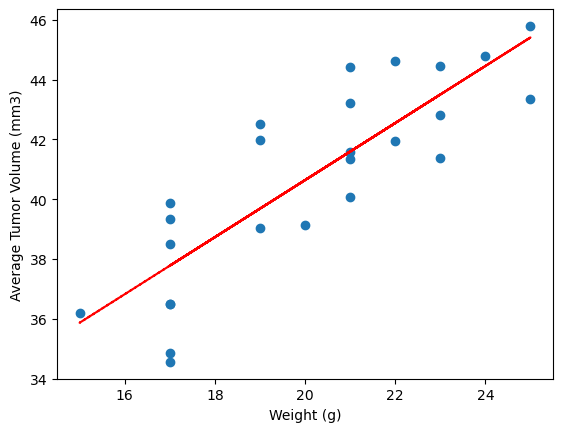

In [246]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)

y = slope * x_values + intercept

plt.scatter(x_values,y_values)
plt.plot(x_values,y,"r--")
plt.xlabel("Weight (g)")
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()